In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_596559/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_vllm = pd.read_clipboard(sep="|",header=0,skiprows=[1])
df_vllm = df_vllm.iloc[:,1:-1]
df_vllm = df_vllm.drop_duplicates()
df_vllm.head()

,Input Length,Output Length,Throughput (requests/s),Throughput (output token/s),Average latency per token (ms),Average latency per output token (ms)
0,128,128,19.59,2507.52,7.52,15.04
1,128,512,4.90,2506.87,12.13,15.17
2,128,1024,1.93,1973.31,13.66,15.36
3,128,2048,0.70,1436.41,14.59,15.50
4,512,128,9.82,1257.11,3.17,15.85


In [3]:
df_vllm["input_output_len"] = "I_" + df_vllm[' Input Length '].astype(str) +"_O_"+ df_vllm[' Output Length '].astype(str)
df_vllm.head()

,Input Length,Output Length,Throughput (requests/s),Throughput (output token/s),Average latency per token (ms),Average latency per output token (ms),input_output_len
0,128,128,19.59,2507.52,7.52,15.04,I_128_O_128
1,128,512,4.90,2506.87,12.13,15.17,I_128_O_512
2,128,1024,1.93,1973.31,13.66,15.36,I_128_O_1024
3,128,2048,0.70,1436.41,14.59,15.50,I_128_O_2048
4,512,128,9.82,1257.11,3.17,15.85,I_512_O_128


In [4]:
df_vllm = df_vllm.drop([' Input Length ',' Output Length '],axis=1)
df_vllm.head()

,Throughput (requests/s),Throughput (output token/s),Average latency per token (ms),Average latency per output token (ms),input_output_len
0,19.59,2507.52,7.52,15.04,I_128_O_128
1,4.90,2506.87,12.13,15.17,I_128_O_512
2,1.93,1973.31,13.66,15.36,I_128_O_1024
3,0.70,1436.41,14.59,15.50,I_128_O_2048
4,9.82,1257.11,3.17,15.85,I_512_O_128


## Start TGI

In [6]:
df_tgi = pd.read_clipboard(sep="|",header=0,skiprows=[1])
df_tgi = df_tgi.iloc[:,1:-1]
df_tgi = df_tgi.drop_duplicates()
df_tgi.head()

,Input Length,Output Length,Throughput (requests/s),Throughput (output token/s),Average latency per token (ms),Average latency per output token (ms)
0,128,128,20.50,2118.39,6.78,15.76
1,128,512,7.69,2497.66,8.58,15.86
2,128,1024,4.48,2313.66,9.31,16.21
3,128,2048,2.04,1842.03,8.23,16.38
4,512,128,8.89,954.75,2.63,17.18


In [7]:
df_tgi["input_output_len"] = "I_" + df_tgi[' Input Length '].astype(str) +"_O_"+ df_tgi[' Output Length '].astype(str)
df_tgi.head()

,Input Length,Output Length,Throughput (requests/s),Throughput (output token/s),Average latency per token (ms),Average latency per output token (ms),input_output_len
0,128,128,20.50,2118.39,6.78,15.76,I_128_O_128
1,128,512,7.69,2497.66,8.58,15.86,I_128_O_512
2,128,1024,4.48,2313.66,9.31,16.21,I_128_O_1024
3,128,2048,2.04,1842.03,8.23,16.38,I_128_O_2048
4,512,128,8.89,954.75,2.63,17.18,I_512_O_128


In [8]:
df_tgi = df_tgi.drop([' Input Length ',' Output Length '],axis=1)
df_tgi.head()

,Throughput (requests/s),Throughput (output token/s),Average latency per token (ms),Average latency per output token (ms),input_output_len
0,20.50,2118.39,6.78,15.76,I_128_O_128
1,7.69,2497.66,8.58,15.86,I_128_O_512
2,4.48,2313.66,9.31,16.21,I_128_O_1024
3,2.04,1842.03,8.23,16.38,I_128_O_2048
4,8.89,954.75,2.63,17.18,I_512_O_128


In [9]:
mdf = pd.merge(left=df_tgi,right=df_vllm,on="input_output_len",how="left",suffixes=("_tgi","_vllm"))
mdf.head()

,Throughput (requests/s) _tgi,Throughput (output token/s) _tgi,Average latency per token (ms) _tgi,Average latency per output token (ms) _tgi,input_output_len,Throughput (requests/s) _vllm,Throughput (output token/s) _vllm,Average latency per token (ms) _vllm,Average latency per output token (ms) _vllm
0,20.50,2118.39,6.78,15.76,I_128_O_128,19.59,2507.52,7.52,15.04
1,7.69,2497.66,8.58,15.86,I_128_O_512,4.90,2506.87,12.13,15.17
2,4.48,2313.66,9.31,16.21,I_128_O_1024,1.93,1973.31,13.66,15.36
3,2.04,1842.03,8.23,16.38,I_128_O_2048,0.70,1436.41,14.59,15.50
4,8.89,954.75,2.63,17.18,I_512_O_128,9.82,1257.11,3.17,15.85


In [10]:
from collections import defaultdict
# name map
n_map = defaultdict(list)

In [11]:

cs = list(mdf.columns)

cs.remove("input_output_len")

for c in cs:
    k = c.split("_vllm")[0].split("_tgi")[0]
    n_map[k].append(c)

n_map

defaultdict(list,
            {' Throughput (requests/s) ': [' Throughput (requests/s) _tgi',
              ' Throughput (requests/s) _vllm'],
             ' Throughput (output token/s) ': [' Throughput (output token/s) _tgi',
              ' Throughput (output token/s) _vllm'],
             ' Average latency per token (ms) ': [' Average latency per token (ms) _tgi',
              ' Average latency per token (ms) _vllm'],
             ' Average latency per output token (ms) ': [' Average latency per output token (ms) _tgi',
              ' Average latency per output token (ms) _vllm']})

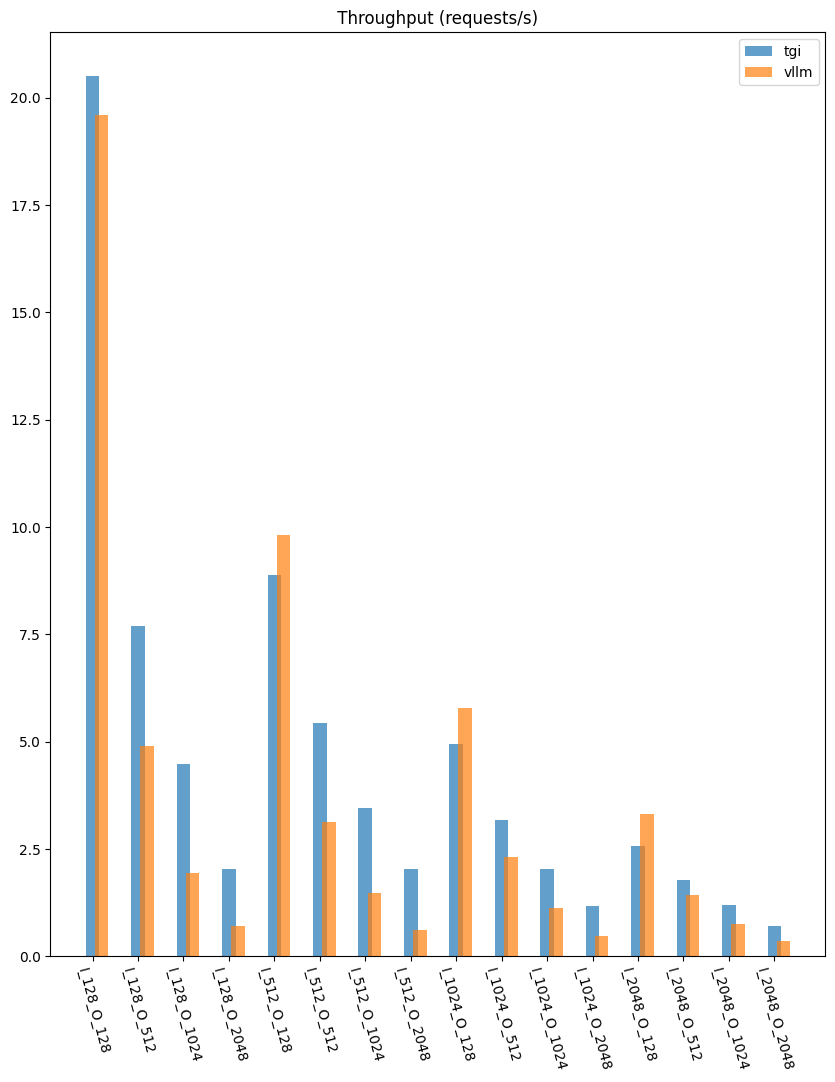

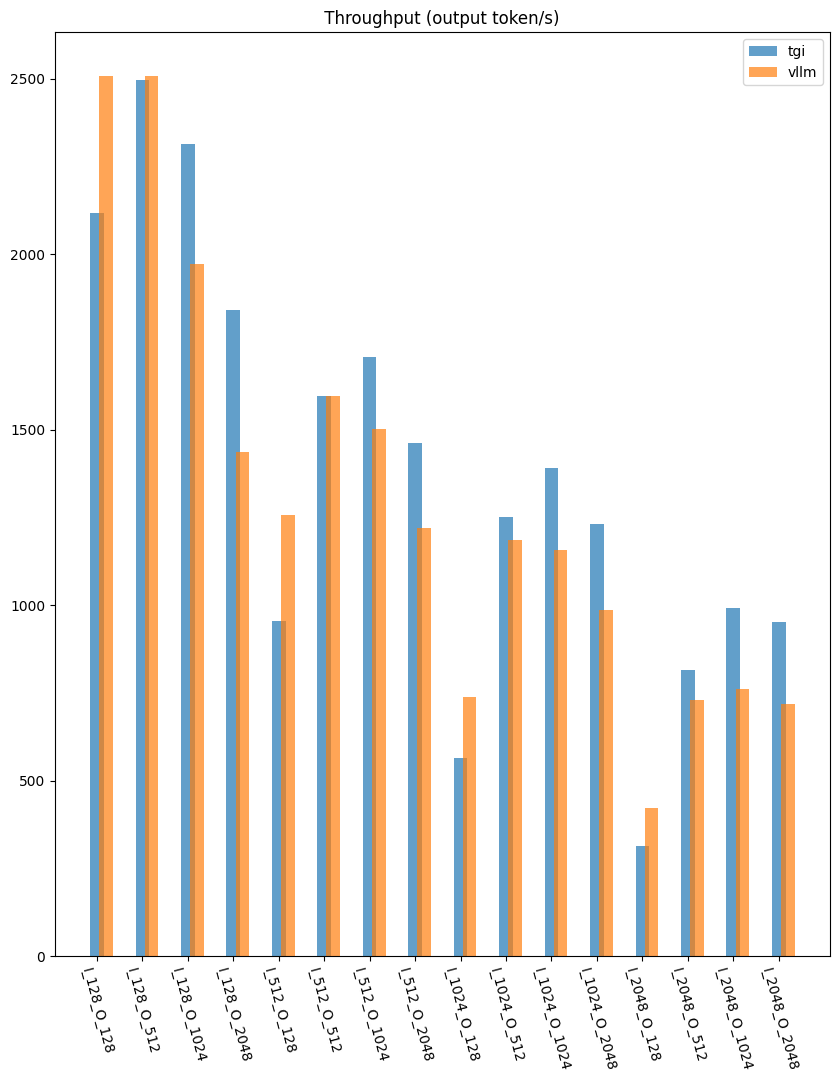

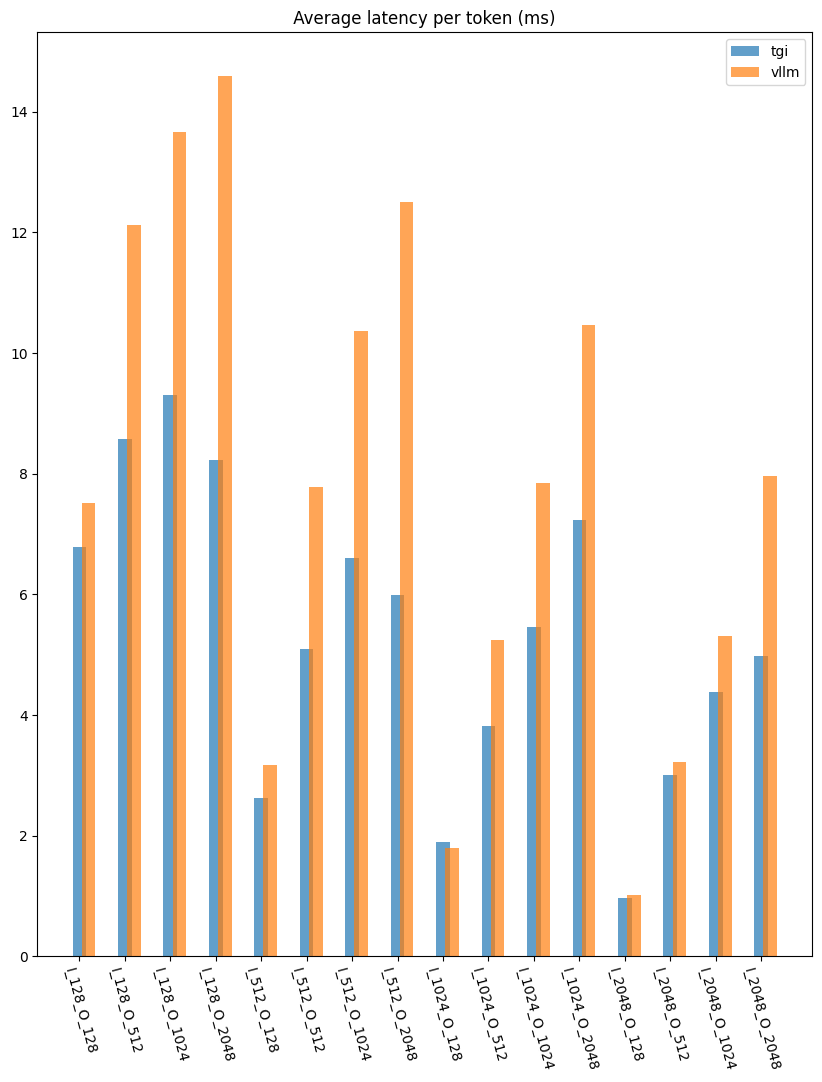

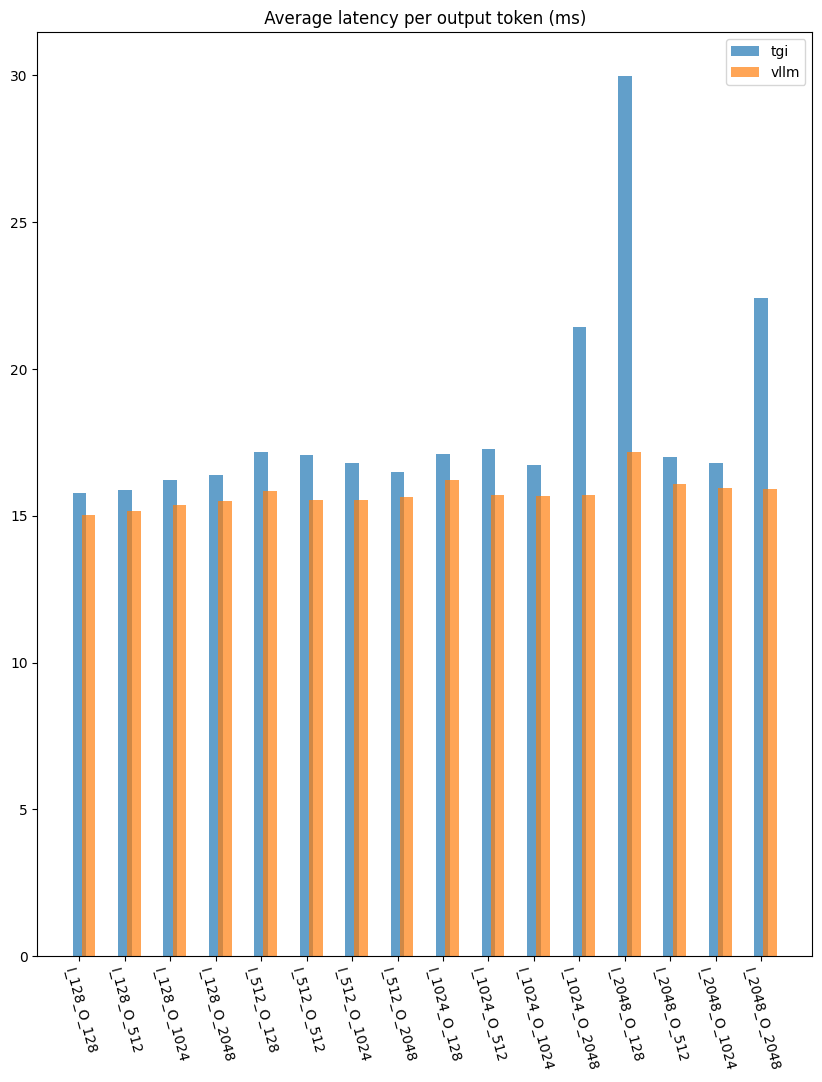

In [14]:

for var, c_names in n_map.items():
    plt.figure(figsize=(10, 12))
    for i, c_name in enumerate(c_names):
        offsets = np.arange(len(mdf["input_output_len"])) + i * 0.2
        plt.bar(
            offsets,
            mdf[c_name],
            alpha=0.7,
            label=c_name.split(var + "_")[-1],
            width=0.3,
        )
    plt.legend()
    plt.title(var)
    plt.xticks(range(len(mdf["input_output_len"])),mdf["input_output_len"].values,rotation=-75)
    
    # 
    plt.savefig(f"{var.replace('/','_')}.png")